In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
d = pd.read_csv(r'C:\Users\user\Downloads\C6_bmi.csv')
d

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
d['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [5]:
x = d.drop('Gender',axis=1)
y=d['Gender']

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
d.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [8]:
d1 = d[['Gender', 'Height', 'Weight', 'Index']]
d1

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [9]:
d1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [13]:
d2 = d1.fillna(0)

In [12]:
x = d2[[ 'Height', 'Weight', 'Index']]
y = d2['Gender']

In [11]:
g1 = {"Verified":{'Male':1,'Female':2}}
d2= d2.replace(g1)
print(d2)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
y_train.shape

(350,)

In [18]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
parameters = {
    'max_depth':[10,20,50,60,30],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 60, 30],
                         'min_samples_leaf': [35, 16, 75, 70, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [22]:
grid_search.best_score_

0.5657142857142857

In [23]:
from sklearn.tree import plot_tree

In [24]:
rfc_best= grid_search.best_estimator_

[Text(1953.0, 2989.7999999999997, 'Height <= 145.5\ngini = 0.486\nsamples = 219\nvalue = [204, 146]\nclass = Yes'),
 Text(1674.0, 2446.2, 'gini = 0.444\nsamples = 17\nvalue = [11, 22]\nclass = No'),
 Text(2232.0, 2446.2, 'Weight <= 97.5\ngini = 0.476\nsamples = 202\nvalue = [193, 124]\nclass = Yes'),
 Text(1116.0, 1902.6, 'Height <= 164.5\ngini = 0.409\nsamples = 87\nvalue = [97, 39]\nclass = Yes'),
 Text(558.0, 1358.9999999999998, 'Weight <= 70.5\ngini = 0.371\nsamples = 34\nvalue = [46, 15]\nclass = Yes'),
 Text(279.0, 815.3999999999996, 'gini = 0.264\nsamples = 18\nvalue = [27, 5]\nclass = Yes'),
 Text(837.0, 815.3999999999996, 'gini = 0.452\nsamples = 16\nvalue = [19, 10]\nclass = Yes'),
 Text(1674.0, 1358.9999999999998, 'Weight <= 78.5\ngini = 0.435\nsamples = 53\nvalue = [51, 24]\nclass = Yes'),
 Text(1395.0, 815.3999999999996, 'gini = 0.491\nsamples = 26\nvalue = [21, 16]\nclass = Yes'),
 Text(1953.0, 815.3999999999996, 'gini = 0.332\nsamples = 27\nvalue = [30, 8]\nclass = Yes')

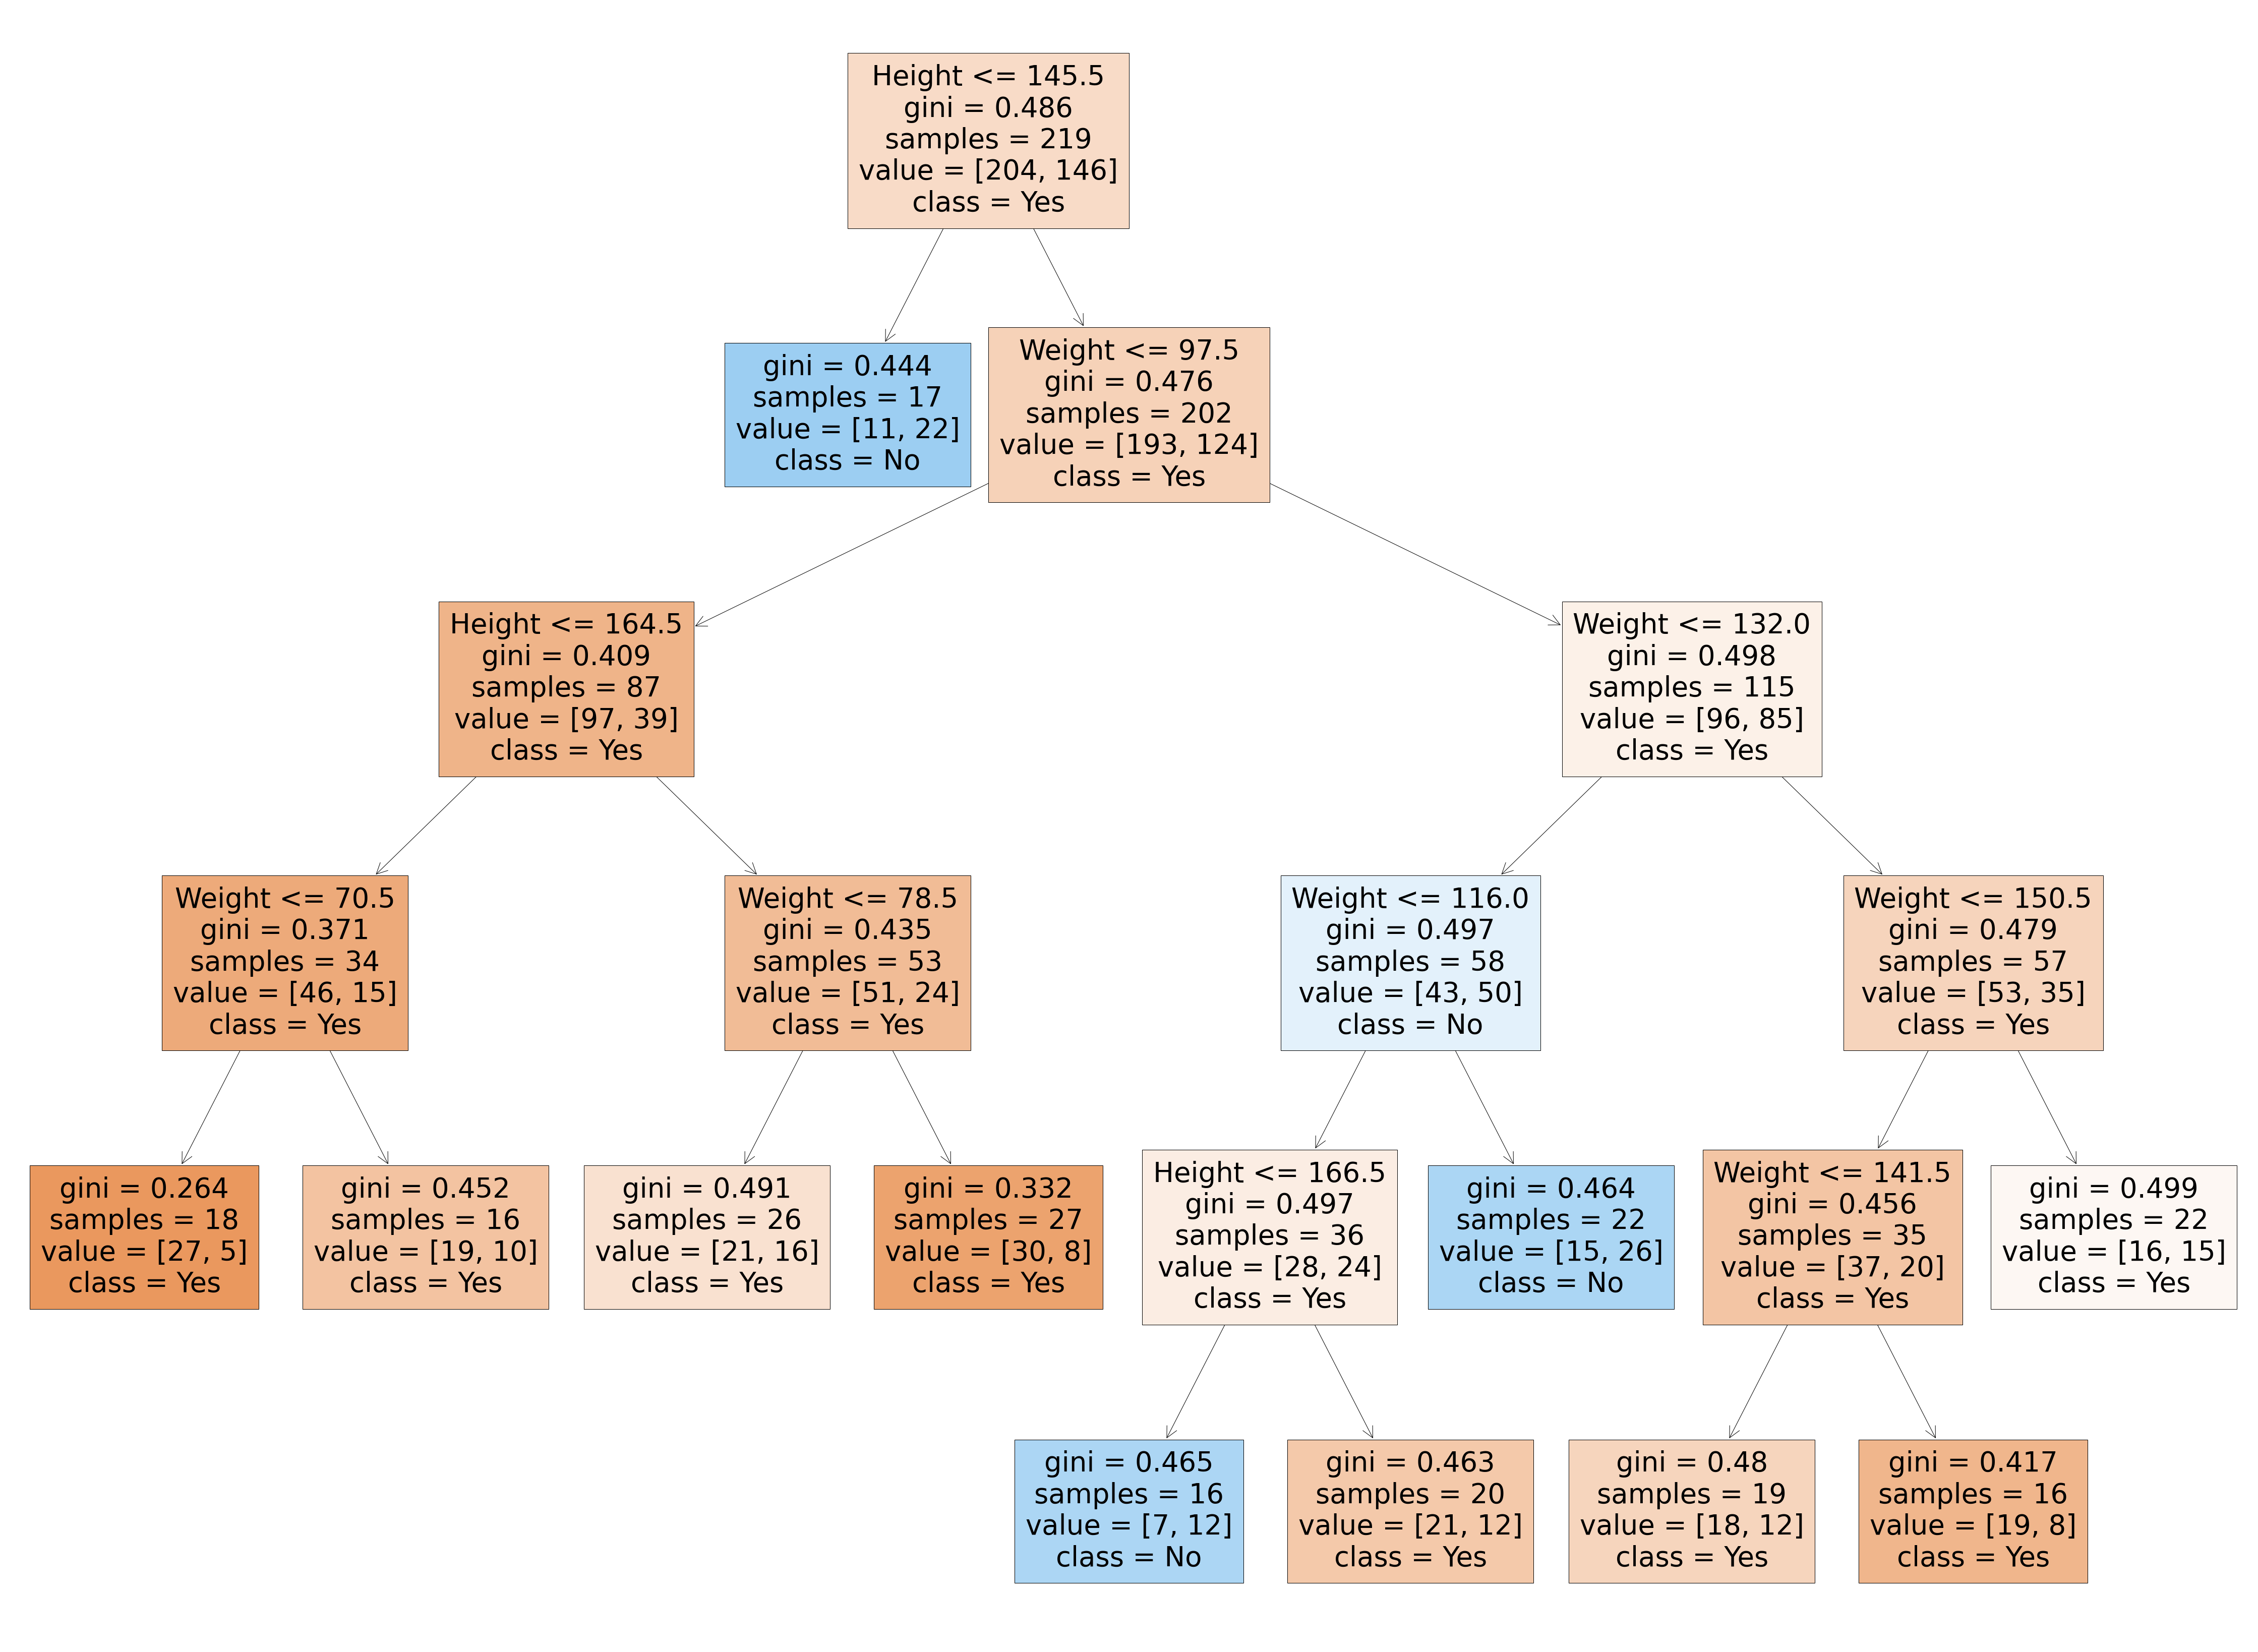

In [25]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["Yes","No"],filled=True)